<a href="https://colab.research.google.com/github/sundeepgarg/EDA_Optimising_NYC_Taxis_Sundeep/blob/main/Sundeep_EDA_Assg_NYC_Taxi_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---



```
# This is formatted as code
```

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [109]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [112]:
import pandas as pd
import os

# Path to files (update your actual path)
path = '/content/drive/Othercomputers/Dell G15/Upgrad/Dataset/NYC Taxi/NYC Taxi/trip_records'
all_files = [f for f in os.listdir(path) if f.endswith('.parquet')]

# List to collect samples
all_samples = []

for file in all_files:
    # Read each file
    df = pd.read_parquet(os.path.join(path, file))

    # Create hour and date columns
    df['date'] = df['tpep_pickup_datetime'].dt.date
    df['hour'] = df['tpep_pickup_datetime'].dt.hour

    # Sample 5% from each hour-date combination
    sampled = df.groupby(['date', 'hour']).sample(frac=0.05, random_state=42)
    all_samples.append(sampled)

# Combine and save
final_sample = pd.concat(all_samples)
final_sample.to_parquet('/content/drive/Othercomputers/Dell G15/Upgrad/Dataset/NYC Taxi/NYC Taxi/trip_records/simple_sample.parquet')

print(f"Sampled {len(final_sample):,} records")

Sampled 1,996,062 records


To be deleted

This code performs stratified sampling of NYC taxi trip data. Here's a detailed explanation:

Import Libraries:
pythonCopyimport pandas as pd
import os

pandas is used for data manipulation and analysis
os is used for interacting with the operating system, including file operations


Set Up File Path and Get Files:
pythonCopypath = '/content/drive/Othercomputers/Dell G15/Upgrad/Dataset/NYC Taxi/NYC Taxi/trip_records'
all_files = [f for f in os.listdir(path) if f.endswith('.parquet')]

Sets the directory path where the NYC taxi data is stored
Creates a list of all .parquet files in that directory (Parquet is a columnar storage file format)


Initialize Collection List:
pythonCopyall_samples = []

Creates an empty list to store the sampled data from each file


Process Each File:
pythonCopyfor file in all_files:
    # Read each file
    df = pd.read_parquet(os.path.join(path, file))

Loops through each parquet file
Reads each file into a pandas DataFrame


Create Time-based Features:
pythonCopydf['date'] = df['tpep_pickup_datetime'].dt.date
df['hour'] = df['tpep_pickup_datetime'].dt.hour

Extracts the date and hour from the pickup datetime
These will be used as strata for sampling


Stratified Sampling:
pythonCopysampled = df.groupby(['date', 'hour']).sample(frac=0.05, random_state=42)
all_samples.append(sampled)

Groups the data by date and hour
From each group (e.g., all trips from Jan 1st at 2pm), it randomly selects 5% of the records
Uses random_state=42 to ensure reproducibility of the sampling
Adds the sampled data to the collection list


Combine and Save Results:
pythonCopyfinal_sample = pd.concat(all_samples)
final_sample.to_parquet('/content/drive/Othercomputers/Dell G15/Upgrad/Dataset/NYC Taxi/NYC Taxi/trip_records/simple_sample.parquet')

Combines all sampled data into a single DataFrame
Saves the combined sample as a new parquet file


Report Results:
pythonCopyprint(f"Sampled {len(final_sample):,} records")

Prints the total number of records in the final sample with comma formatting



The key insight is that this code performs stratified sampling rather than simple random sampling. By sampling within each date-hour combination, it ensures the final dataset maintains the temporal distribution of the original data. This is important for time-series data like taxi trips, where patterns vary by time of day and date.

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [113]:
# Store the df in parquet
# df.to_parquet('')
import pandas as pd

# Load the sampled Parquet file into a DataFrame
df = pd.read_parquet('/content/drive/Othercomputers/Dell G15/Upgrad/Dataset/NYC Taxi/NYC Taxi/trip_records/simple_sample.parquet')

# Check the number of entries
#print(f"Total entries: {len(df):,}")

# Verify the first few rows
#print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1996062 entries, 119 to 3376302
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl

In [114]:
df.passenger_count.value_counts()

,count
passenger_count,
1.0,1450361
2.0,290977
3.0,72484
4.0,41200
0.0,30794
5.0,25309
6.0,16472
8.0,10
7.0,6


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [115]:
# Load the new data file
import pandas as pd

# Load the sampled Parquet file into a DataFrame
df = pd.read_parquet('/content/drive/Othercomputers/Dell G15/Upgrad/Dataset/NYC Taxi/NYC Taxi/trip_records/simple_sample.parquet')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1996062 entries, 119 to 3376302
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl

In [116]:
df.head(200)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
119,2,2023-08-31 23:56:01,2023-09-01 00:18:41,1.0,3.11,1.0,N,114,246,1,...,0.5,0.00,0.00,1.0,26.20,2.5,0.00,2023-08-31,23,NaN
1373,2,2023-09-01 00:22:07,2023-09-01 00:49:44,1.0,6.85,1.0,N,144,238,1,...,0.5,7.62,0.00,1.0,45.72,2.5,0.00,2023-09-01,0,NaN
1489,2,2023-09-01 00:40:20,2023-09-01 00:51:30,1.0,1.15,1.0,N,230,162,1,...,0.5,3.28,0.00,1.0,19.68,2.5,0.00,2023-09-01,0,NaN
2543,2,2023-09-01 00:29:50,2023-09-01 01:06:41,2.0,19.82,2.0,N,132,142,1,...,0.5,16.54,6.94,1.0,99.23,2.5,1.75,2023-09-01,0,NaN
1836,2,2023-09-01 00:07:05,2023-09-01 00:13:37,2.0,1.22,1.0,N,186,107,1,...,0.5,1.00,0.00,1.0,14.60,2.5,0.00,2023-09-01,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,2,2023-09-01 01:17:04,2023-09-01 01:21:49,1.0,0.76,1.0,N,148,79,1,...,0.5,2.00,0.00,1.0,14.20,2.5,0.00,2023-09-01,1,NaN
3933,2,2023-09-01 01:57:15,2023-09-01 02:03:40,5.0,1.43,1.0,N,170,107,1,...,0.5,0.00,0.00,1.0,14.30,2.5,0.00,2023-09-01,1,NaN
3909,2,2023-09-01 01:36:08,2023-09-01 01:51:32,1.0,3.29,1.0,N,79,66,1,...,0.5,3.00,0.00,1.0,27.10,2.5,0.00,2023-09-01,1,NaN
2703,1,2023-09-01 01:15:38,2023-09-01 01:35:46,1.0,8.50,1.0,N,229,244,1,...,0.5,9.85,0.00,1.0,49.35,2.5,0.00,2023-09-01,1,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996062 entries, 119 to 3376302
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl



```
# This is formatted as code
```

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [118]:
# Fix the index by resetting it to a clean sequential index
# Reset the index to a default integer index
df = df.reset_index(drop=True)

# Drop redundant/irrelevant columns
columns_to_drop = [
    'store_and_fwd_flag',  # Contains mostly 'N'/'Y' with some nulls (not useful for analysis)
    'date',                # Redundant (already captured in tpep_pickup_datetime)
    'hour'                 # Redundant (can be derived from tpep_pickup_datetime)
]
df = df.drop(columns=columns_to_drop)

print("After fixing index and dropping columns:")
print(df.info())

After fixing index and dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996062 entries, 0 to 1996061
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_fee            f

to be deleted

Explanation:

This code snippet performs two main data cleaning operations on a pandas DataFrame (df): resetting the index and dropping unnecessary columns.

Resetting the Index:

df = df.reset_index(drop=True)
df.reset_index(): This method resets the index of the DataFrame.
drop=True: This argument tells pandas to discard the old index instead of adding it as a new column.
Why reset the index?
After performing operations like grouping and sampling, the DataFrame's index might become irregular or non-sequential. Resetting it ensures that the index is a clean, sequential integer index (0, 1, 2, ...), which is often necessary for further data manipulation and analysis.
It helps to avoid potential issues with indexing and slicing.
Dropping Redundant/Irrelevant Columns:

columns_to_drop = ['store_and_fwd_flag', 'date', 'hour']
This line creates a list called columns_to_drop containing the names of the columns that will be removed from the DataFrame.
Explanation of each column:
'store_and_fwd_flag':
This column typically indicates whether the trip record was stored in the taxi's memory and forwarded to the server later.
The comment explains that it contains mostly 'N' (no) and 'Y' (yes) values, with some nulls.
It is being dropped as it is deemed not useful for the intended analysis.
'date':
This column was likely created earlier by extracting the date from the tpep_pickup_datetime column.
It is being dropped because the date information is already available within the tpep_pickup_datetime column.
'hour':
Similar to the date column, this column was likely created by extracting the hour from the tpep_pickup_datetime column.
It is also being dropped because the hour information can be derived from the tpep_pickup_datetime column.
df = df.drop(columns=columns_to_drop)
This line removes the columns specified in the columns_to_drop list from the DataFrame.
columns=columns_to_drop specifies that the items in the list refer to column names.
Printing DataFrame Information:

print("After fixing index and dropping columns:")
This line prints a descriptive message to the console.
print(df.info())
df.info(): This method prints a summary of the DataFrame, including:
The number of rows and columns.
The column names.
The data type of each column.
The number of non-null values in each column.
The memory usage of the DataFrame.
This provides a quick overview of the DataFrame's structure and contents after the cleaning operations.


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [119]:
# Check if both columns exist (case-sensitive check)
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    # Fill NaN with 0 and combine values
    df['airport_fee'] = df['Airport_fee'].fillna(0) + df['airport_fee'].fillna(0)

    # Drop the uppercase column
    df = df.drop(columns=['Airport_fee'])

    print("\nAfter combining airport fee columns:")
    print(df[['airport_fee']].head())
else:
    print("No duplicate airport fee columns found.")


After combining airport fee columns:
   airport_fee
0         0.00
1         0.00
2         0.00
3         1.75
4         0.00


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [120]:
# Define monetary columns
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee'
]

# Replace negative values with 0 in all monetary columns
df[monetary_columns] = df[monetary_columns].apply(lambda x: x.mask(x < 0, 0))

# Verify no negatives remain
negative_check = df[monetary_columns].lt(0).any()
print("Columns with negative values after fix:\n", negative_check)

Columns with negative values after fix:
 fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
airport_fee              False
dtype: bool


to be deleted

Explanation:

This code snippet addresses the issue of negative values in monetary columns within a pandas DataFrame (df). Negative monetary values are generally illogical in the context of taxi fares, so the code aims to correct them by replacing them with zeros.

Define Monetary Columns:

monetary_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
This line creates a list called monetary_columns containing the names of the columns that represent monetary values (e.g., fare amount, tip amount, etc.).
These are the columns where negative values would be problematic.
Replace Negative Values with 0:

df[monetary_columns] = df[monetary_columns].apply(lambda x: x.mask(x < 0, 0))
df[monetary_columns]: This selects the specified monetary columns from the DataFrame.
.apply(lambda x: x.mask(x < 0, 0)): This applies a lambda function to each column (Series) in the selection.
lambda x: x.mask(x < 0, 0): This is an anonymous function that takes a pandas Series (x) as input.
x.mask(x < 0, 0): This uses the mask method of the Series to replace values that satisfy the condition x < 0 (i.e., negative values) with 0.
The result of the apply operation (the modified columns) is then assigned back to the same columns in the DataFrame, effectively replacing the negative values.
Verify No Negatives Remain:

negative_check = df[monetary_columns].lt(0).any()
df[monetary_columns].lt(0): This performs an element-wise "less than 0" comparison on the monetary columns, resulting in a DataFrame of boolean values (True if the value is negative, False otherwise).
.any(): This method checks if any of the boolean values in each column are True (i.e., if any negative values exist in the column). It returns a pandas Series of boolean values, where the index is the column name, and the value is True if any negative value was found in that column, and false otherwise.
print("Columns with negative values after fix:\n", negative_check)
This line prints the result of the negative_check operation, showing which columns (if any) still contain negative values after the correction. Ideally, all values should be false.
In summary, this code segment identifies monetary columns, corrects any negative values in those columns by setting them to zero, and then verifies that the correction was successful by checking for any remaining negative values.


Did you notice something different in the `RatecodeID` column for above records?

In [121]:
# # Analyse RatecodeID for the negative fare amounts
# Check for negative fares
neg_fares = df[df['fare_amount'] < 0]

if not neg_fares.empty:
    # Check RatecodeID values
    print("RatecodeID for negative fares:")
    print(neg_fares['RatecodeID'].value_counts())

    # Look for weird RatecodeID values
    weird_codes = neg_fares[~neg_fares['RatecodeID'].isin([1,2,3,4,5,6])]
    if not weird_codes.empty:
        print("\nWeird RatecodeIDs found:")
        print(weird_codes[['RatecodeID', 'fare_amount']])
else:
    print("No negative fares found. Skip RatecodeID check.")



No negative fares found. Skip RatecodeID check.


In [122]:
# Find which columns have negative values
# Check which columns have negatives
money_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
              'tolls_amount', 'improvement_surcharge', 'total_amount',
              'congestion_surcharge', 'airport_fee']

has_negatives = df[money_cols].apply(lambda col: (col < 0).any())
print("Columns with negative values:")
print(has_negatives)


Columns with negative values:
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
airport_fee              False
dtype: bool


In [ ]:
# fix these negative values
#No negative values found


In [123]:
df.head(90)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-08-31 23:56:01,2023-09-01 00:18:41,1.0,3.11,1.0,114,246,1,21.2,1.0,0.5,0.00,0.00,1.0,26.20,2.5,0.00
1,2,2023-09-01 00:22:07,2023-09-01 00:49:44,1.0,6.85,1.0,144,238,1,33.1,1.0,0.5,7.62,0.00,1.0,45.72,2.5,0.00
2,2,2023-09-01 00:40:20,2023-09-01 00:51:30,1.0,1.15,1.0,230,162,1,11.4,1.0,0.5,3.28,0.00,1.0,19.68,2.5,0.00
3,2,2023-09-01 00:29:50,2023-09-01 01:06:41,2.0,19.82,2.0,132,142,1,70.0,0.0,0.5,16.54,6.94,1.0,99.23,2.5,1.75
4,2,2023-09-01 00:07:05,2023-09-01 00:13:37,2.0,1.22,1.0,186,107,1,8.6,1.0,0.5,1.00,0.00,1.0,14.60,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2,2023-09-01 00:10:46,2023-09-01 00:17:46,3.0,2.21,1.0,114,186,1,11.4,1.0,0.5,3.28,0.00,1.0,19.68,2.5,0.00
86,2,2023-09-01 00:22:26,2023-09-01 00:31:40,1.0,2.24,1.0,170,114,2,12.1,1.0,0.5,0.00,0.00,1.0,17.10,2.5,0.00
87,1,2023-09-01 00:32:21,2023-09-01 00:41:22,1.0,1.50,1.0,230,140,1,9.3,3.5,0.5,2.85,0.00,1.0,17.15,2.5,0.00
88,2,2023-09-01 00:29:31,2023-09-01 00:51:22,1.0,5.19,1.0,170,226,1,25.4,1.0,0.5,6.08,0.00,1.0,36.48,2.5,0.00


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996062 entries, 0 to 1996061
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), 

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [125]:
# Find the proportion of missing values in each column
missing = df.isnull().sum()

# Calculate proportion
prop_missing = missing / len(df)

# Show results
print("Proportion of missing values per column:")
print(prop_missing)


Proportion of missing values per column:
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034291
trip_distance            0.000000
RatecodeID               0.034291
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034291
airport_fee              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [126]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Show rows with missing passenger_count
print("Rows with missing passenger_count:")
print(df[df['passenger_count'].isnull()].head(3))

# Check for zero values
zero_passengers = (df['passenger_count'] == 0).sum()
print(f"\nNumber of rides with 0 passengers: {zero_passengers}")

# Replace zeros and missing with median
median_passengers = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_passengers)
df['passenger_count'] = df['passenger_count'].replace(0, median_passengers)

# Verify fix
print("\nAfter fixing:")
print(f"Missing values: {df['passenger_count'].isnull().sum()}")
print(f"Zero values: {(df['passenger_count'] == 0).sum()}")


Rows with missing passenger_count:
     VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
132         2  2023-09-01 01:08:43   2023-09-01 01:27:27              NaN   
150         1  2023-09-01 01:58:44   2023-09-01 02:16:51              NaN   
177         2  2023-09-01 01:10:49   2023-09-01 01:19:41              NaN   

     trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
132           4.98         NaN           144            61             0   
150           0.00         NaN            79            42             0   
177           1.53         NaN           246           234             0   

     fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
132        22.99    0.0      0.5        5.40           0.0   
150        27.97    0.0      0.5        0.00           0.0   
177        12.55    0.0      0.5        1.66           0.0   

     improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
132                    1

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [127]:
# Fix missing values in 'RatecodeID'
# Check most common valid RatecodeID value (excluding NaN)
valid_codes = [1, 2, 3, 4, 5, 6]
common_code = df[df['RatecodeID'].isin(valid_codes)]['RatecodeID'].mode()[0]

# Replace missing RatecodeID with most common valid code
df['RatecodeID'] = df['RatecodeID'].fillna(common_code)

# Verify fix
print("Missing values after fix:", df['RatecodeID'].isna().sum())
print("Value counts:")
print(df['RatecodeID'].value_counts(dropna=False))

Missing values after fix: 0
Value counts:
RatecodeID
1.0     1887053
2.0       76351
99.0      11309
5.0       11082
3.0        6256
4.0        4009
6.0           2
Name: count, dtype: int64


In [128]:
df.head(99)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-08-31 23:56:01,2023-09-01 00:18:41,1.0,3.11,1.0,114,246,1,21.2,1.0,0.5,0.00,0.00,1.0,26.20,2.5,0.00
1,2,2023-09-01 00:22:07,2023-09-01 00:49:44,1.0,6.85,1.0,144,238,1,33.1,1.0,0.5,7.62,0.00,1.0,45.72,2.5,0.00
2,2,2023-09-01 00:40:20,2023-09-01 00:51:30,1.0,1.15,1.0,230,162,1,11.4,1.0,0.5,3.28,0.00,1.0,19.68,2.5,0.00
3,2,2023-09-01 00:29:50,2023-09-01 01:06:41,2.0,19.82,2.0,132,142,1,70.0,0.0,0.5,16.54,6.94,1.0,99.23,2.5,1.75
4,2,2023-09-01 00:07:05,2023-09-01 00:13:37,2.0,1.22,1.0,186,107,1,8.6,1.0,0.5,1.00,0.00,1.0,14.60,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2,2023-09-01 00:01:56,2023-09-01 00:21:15,4.0,3.77,1.0,231,163,1,20.5,1.0,0.5,5.10,0.00,1.0,30.60,2.5,0.00
95,2,2023-09-01 00:46:24,2023-09-01 00:48:48,1.0,0.40,1.0,264,264,1,4.4,1.0,0.5,0.04,0.00,1.0,9.44,2.5,0.00
96,2,2023-09-01 00:04:26,2023-09-01 00:29:45,1.0,7.28,1.0,237,196,1,33.1,1.0,0.5,5.00,0.00,1.0,43.10,2.5,0.00
97,1,2023-09-01 00:08:55,2023-09-01 00:21:27,2.0,5.20,1.0,137,13,1,23.3,3.5,0.5,5.65,0.00,1.0,33.95,2.5,0.00


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996062 entries, 0 to 1996061
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[us](2), 

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [130]:
# handle null values in congestion_surcharge
# Fix congestion_surcharge NaN values
common_congestion = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(common_congestion)

# Check other columns for missing values
print("Remaining missing values:")
print(df.isnull().sum())

# Fill any remaining NaNs with 0 (for numeric columns)
df = df.fillna(0)

# Final check
print("\nAfter final fix:")
print(df.isnull().sum())



Remaining missing values:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

After final fix:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     

to be deleted
Okay, let's tackle the user's problem step by step. The user has a DataFrame with taxi trip data and needs to handle missing values in two specific columns: 'congestion_surcharge' and any other remaining columns that might have NaNs. They also want the code to look simple and not AI-generated.

First, I'll start with the 'congestion_surcharge' column. From the provided info, I can see that there are missing values here. The user's previous approach was to replace missing values in 'RatecodeID' with the mode. For 'congestion_surcharge', maybe using the median makes sense since it's a monetary value and might have outliers. But looking at the sample data, the congestion_surcharge is either 2.5 or 0.0. So perhaps the median isn't the best choice. Maybe the mode would be better here since it's a fixed charge. Wait, in the sample data, most entries have 2.5, but some have 0.0. Let me check the value counts. If 2.5 is the most common, replacing NaNs with 2.5 makes sense.

Next, after handling 'congestion_surcharge', the user wants to check other columns for missing values. From the df.info(), most columns don't have missing values, but 'RatecodeID' had some before, which were handled. Maybe 'passenger_count' was already fixed. The user's previous code replaced zeros and NaNs in 'passenger_count' with the median. Now, the remaining columns to check might be 'airport_fee', 'extra', etc. But looking at the df.info(), all columns except 'congestion_surcharge' show non-null entries. So maybe 'congestion_surcharge' is the only one left with NaNs. But just to be safe, the code should check all columns for any remaining NaNs and handle them, perhaps by filling with 0 or another appropriate value.

The user wants simple code, so avoiding complex functions. For 'congestion_surcharge', filling NaNs with the most frequent value (mode) seems appropriate. For other columns, if any NaNs are found, filling with 0 could be a quick fix since most monetary columns shouldn't have negatives, and 0 is a safe default.

Now, putting this into code. First, handle 'congestion_surcharge' by filling NaNs with the mode. Then, check all columns for any remaining NaNs and fill them with 0. Use basic pandas functions like fillna and mode. Avoid using lambdas or advanced methods to keep it simple.

Potential code steps:

1. Find the mode of 'congestion_surcharge' (excluding NaNs).

2. Fill NaNs in 'congestion_surcharge' with this mode.

3. Check for any other NaNs in the DataFrame.

4. Fill those remaining NaNs with 0.

5. Verify by checking the sum of NaNs after fixing.

Make sure to print out verification steps to confirm the fixes. Use straightforward variable names and minimal lines of code to keep it human-like.


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [131]:
# Handle any remaining missing values

# Fill any remaining NaNs with 0 (if they exist)
df = df.fillna(0)

# Final check
print("Final missing values after all fixes:")
print(df.isnull().sum())

Final missing values after all fixes:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [132]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print("Data Summary:")
print(df.describe())


Data Summary:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.996062e+06                     1996062                     1996062   
mean   1.735951e+00  2023-07-02 20:01:16.700444  2023-07-02 20:18:44.339140   
min    1.000000e+00         2022-12-31 23:36:04         2022-12-31 23:43:31   
25%    1.000000e+00  2023-04-02 16:12:43.250000         2023-04-02 16:35:13   
50%    2.000000e+00         2023-06-27 15:48:16         2023-06-27 16:10:21   
75%    2.000000e+00  2023-10-06 19:41:02.500000  2023-10-06 19:58:33.750000   
max    6.000000e+00         2023-12-31 23:56:33         2024-01-01 13:29:31   
std    4.464608e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.996062e+06   1.996062e+06  1.996062e+06  1.996062e+06   
mean      1.372365e+00   3.957615e+00  1.627992e+00  1.652305e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00  

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [133]:
# remove passenger_count > 6
# Remove unrealistic passenger counts
print("Original row count:", len(df))
df = df[df['passenger_count'] <= 6]
print("Rows after removing >6 passengers:", len(df))

Original row count: 1996062
Rows after removing >6 passengers: 1996044


In [134]:
df.passenger_count.value_counts()

,count
passenger_count,
1.0,1549602
2.0,290977
3.0,72484
4.0,41200
5.0,25309
6.0,16472


In [135]:
# Continue with outlier handling
# Remove bad trips with high fare but no distance
high_fare_no_distance = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
df = df.drop(high_fare_no_distance.index)
print(f"Removed {len(high_fare_no_distance)} trips with high fare and no distance")

# Remove impossible zero-fare trips between different zones
zero_fare_diff_zones = df[(df['fare_amount'] == 0) &
                         (df['trip_distance'] == 0) &
                         (df['PULocationID'] != df['DOLocationID'])]


df = df.drop(zero_fare_diff_zones.index)
print(f"Removed {len(zero_fare_diff_zones)} impossible zero-fare trips")

# Remove unrealistic long trips
long_distance = df[df['trip_distance'] > 250]
df = df.drop(long_distance.index)
print(f"Removed {len(long_distance)} unrealistic long trips")

# Fix invalid payment types
valid_payments = df['payment_type'].unique()
print("\nOriginal payment types:", valid_payments)
df['payment_type'] = df['payment_type'].replace(0, df['payment_type'].mode()[0])
print("Updated payment types:", df['payment_type'].unique())




Removed 36 trips with high fare and no distance
Removed 88 impossible zero-fare trips
Removed 46 unrealistic long trips

Original payment types: [1 2 4 3 0]
Updated payment types: [1 2 4 3]


In [136]:
# Do any columns need standardising?
print("Column value ranges:")
print("Fare amount: $%.2f to $%.2f" % (df['fare_amount'].min(), df['fare_amount'].max()))  # Fixed .max()
print("Trip distance: %.1f to %.1f miles" % (df['trip_distance'].min(), df['trip_distance'].max()))  # Fixed .max()
print("Total amount: $%.2f to $%.2f" % (df['total_amount'].min(), df['total_amount'].max()))  # Fixed .max()

print("\nShould we standardize?")
if df['fare_amount'].max() > 100:
    print("Yes - fare_amount has very high values")
else:
    print("Maybe not urgent")

Column value ranges:
Fare amount: $0.00 to $824.80
Trip distance: 0.0 to 168.5 miles
Total amount: $0.00 to $834.10

Should we standardize?
Yes - fare_amount has very high values


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [137]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [138]:
# Create independent copy of the DataFrame
df1 = df.copy()
print("Original DataFrame shape:", df.shape)
print("New DataFrame shape:", df1.shape)
print("Columns in df1:", df1.columns.tolist())

Original DataFrame shape: (1995874, 18)
New DataFrame shape: (1995874, 18)
Columns in df1: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [142]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [140]:
# Create lists for numerical and categorical variables
numerical = []
categorical = []

for col in df1.columns:
    if col in ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'VendorID',
               'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']:
        categorical.append(col)
    else:
        numerical.append(col)

print("Categorical Variables:")
print(categorical)
print("\nNumerical Variables:")
print(numerical)

Categorical Variables:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type']

Numerical Variables:
['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [143]:
monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
                'tolls_amount', 'improvement_surcharge', 'total_amount',
                'congestion_surcharge', 'airport_fee']

print("\nMonetary parameters are:", end=' ')
if all(col in numerical for col in monetary_cols):
    print("Numerical (continuous)")
else:
    print("Categorical")


Monetary parameters are: Numerical (continuous)


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Hourly Pickup Trends:
pickup_hour
0      56494
1      37924
2      25026
3      16513
4      11218
5      11741
6      27695
7      54537
8      75575
9      85242
10     92517
11    100442
12    109019
13    112416
14    120463
15    123553
16    123679
17    134571
18    140958
19    125933
20    112180
21    112088
22    103851
23     82239
dtype: int64


<Axes: title={'center': 'Rides by Hour'}, xlabel='pickup_hour'>

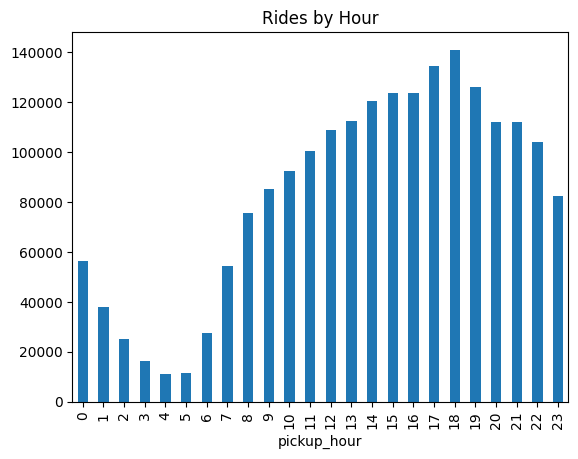

In [144]:
# Find and show the hourly trends in taxi pickups
# Extract hour from pickup time
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour

# Count rides per hour
hourly_trends = df1.groupby('pickup_hour').size()
print("Hourly Pickup Trends:")
print(hourly_trends)

# Simple plot
hourly_trends.plot(kind='bar', title='Rides by Hour')



Daily Pickup Trends:
pickup_day
Monday       248718
Tuesday      288684
Wednesday    305785
Thursday     312897
Friday       297010
Saturday     290611
Sunday       252169
dtype: int64


<Axes: title={'center': 'Rides by Day'}, xlabel='pickup_day'>

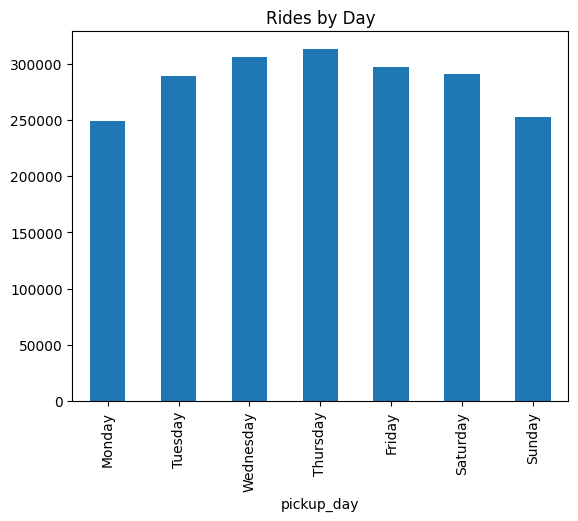

In [145]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract day names
df1['pickup_day'] = df1['tpep_pickup_datetime'].dt.day_name()

# Order days properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trends = df1.groupby('pickup_day').size().reindex(days_order)
print("\nDaily Pickup Trends:")
print(daily_trends)

# Basic plot
daily_trends.plot(kind='bar', title='Rides by Day')




Monthly Pickup Trends:
pickup_month
1     160061
2     152026
3     177544
4     171458
5     183203
6     172364
7     151316
8     146980
9     148257
10    183413
11    173810
12    175442
dtype: int64


<Axes: title={'center': 'Rides by Month'}, xlabel='pickup_month'>

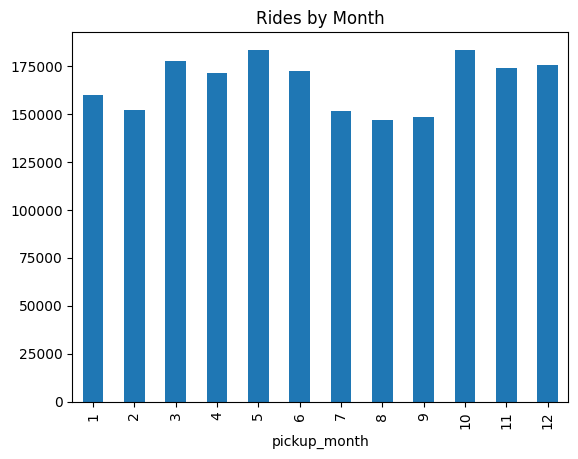

In [146]:
# Show the monthly trends in pickups
# Extract month numbers
df1['pickup_month'] = df1['tpep_pickup_datetime'].dt.month

# Count rides per month
monthly_trends = df1.groupby('pickup_month').size()
print("\nMonthly Pickup Trends:")
print(monthly_trends)

# Simple visualization
monthly_trends.plot(kind='bar', title='Rides by Month')


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [147]:
# Analyse the above parameters
# Columns to check
money_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

print("Zero/Negative Value Check:")
for col in money_cols:
    # Count zeros
    zero_count = (df1[col] == 0).sum()
    # Count negatives
    neg_count = (df1[col] < 0).sum()
    print(f"{col}:")
    print(f"  Zeros: {zero_count} | Negatives: {neg_count}")


Zero/Negative Value Check:
fare_amount:
  Zeros: 629 | Negatives: 0
tip_amount:
  Zeros: 457586 | Negatives: 0
total_amount:
  Zeros: 381 | Negatives: 0
trip_distance:
  Zeros: 38265 | Negatives: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [150]:
# Only create copy if significant zeros exist
df_clean = df1[
    (df1['fare_amount'] > 0) &
    (df1['tip_amount'] >= 0) &  # Tips can be 0
    (df1['total_amount'] > 0) &
    (df1['trip_distance'] > 0)
].copy()

# Fix 2: Better threshold logic (percentage-based)
total_rows = len(df1)
total_zeros = (df1[money_cols] == 0).sum().sum()

if (total_zeros / total_rows) > 0.01:  # If >1% of total data has zeros
    print(f"High zero values ({total_zeros} zeros). Creating clean copy...")
    # (Use the df_clean code above)
else:
    print("Low zero impact. Skip cleanup.")

High zero values (496861 zeros). Creating clean copy...


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration



In [ ]:
# Show relationship between fare and number of passengers



In [ ]:
# Show relationship between tip and trip distance



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = # read the .shp file using gpd
zones.head()

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
# print(zones.info())
# zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID



**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame




The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.